## "Which cities to shut down" as a knapsack problem

During the COVID crisis, policy makers around the world have been faced with the tough decision of imposing blanket personal isolation policies (or variants thereof) in order to reduce contagion. The tradeoff, of course, is that shutting down economic activity is a (mostly) necessary byproduct of such policies. One way to balance the tradeoff, is to allow for some maximum limit of sick population. This limit could be defined by many factors, one of the most important ones being the capacity of the available health care resources.

So here we're faced with a tradeoff problem:

> How do we choose which cities to "shut-down" such that we bring the sick population to within the limits of our maximum capacity, while at the same time maximising the GDP of the country.

In its simplest formulation, this is essentially the knapsack problem. We can choose to completely "shut-down" a city, which would reduce the number of sick people to 0, while also reducing the GDP of that city to 0. In the knapsack analogy, the cities we want to leave open are objects we put in the knapsack. Their numbers of sick people are their weights. And their GDPs are their values.

Let's see the simplest formulation in action below.

In [1]:
from solvers.knapsack import *
from utils.plot_map import plot_map
import matplotlib.pyplot as plt

In [2]:
data_file = 'july.csv' # contains cities, gdps, number of sick people

df = pd.read_csv(data_file)

n_sims = 10 # number of low energy results to sample

# the sick capacity is up to the policy maker
# there are about 336000 hospital beds in the whole of the USA (https://globalepidemics.org/hospital-capacity/)
# our data reprents about half of the population
# we can also assume that we can't utilize the full capacity at once due to logistics
# and other healthcare resource constraints
# without the aid of a real policy maker we can put this all together to make a guess
# although a real policy maker would always be free to vary this parameter
sick_capacity = 300000

print(f'Sampling {n_sims} low energy solutions.',
      f'Considering safe capacity of {sick_capacity} sick people at one time,',
      f'in a situation where there are currently {sum(df["sick"])} sick people',
      '\n')

# use D-Wave's hybrid solver to solve the knapsack problem
%time solution = solve_cities(list(df['city']), list(df['gdp']), list(df['sick']), sick_capacity, num_reads=n_sims, verbose=True)

Sampling 10 low energy solutions. Considering safe capacity of 300000 sick people at one time, in a situation where there are currently 840793 sick people 

BEST SOLUTION
Open cities
['Baltimore', 'Boston', 'Cincinnati', 'Cleveland', 'Columbus', 'Denver', 'Detroit', 'Hartford', 'Indianapolis', 'Kansas City', 'Los Angeles', 'Louisville', 'Memphis', 'Milwaukee', 'Nashville', 'New Orleans', 'New York', 'Oklahoma City', 'Philadelphia', 'Pittsburgh', 'Portland', 'Providence', 'Raleigh', 'Richmond', 'Sacramento', 'Salt Lake City', 'San Francisco', 'San Jose', 'Seattle', 'St Louis', 'Virginia Beach', 'Washington DC']


Closed cities
['Atlanta', 'Austin', 'Charlotte', 'Chicago', 'Dallas', 'Honolulu', 'Houston', 'Jacksonville', 'Las Vegas', 'Miami', 'Minneapolis', 'Orlando', 'Phoenix', 'Riverside', 'San Antonio', 'San Diego', 'Stamford', 'Tampa']


Salvaged GDP: 8635729 (65.8%)
Used up hospital capacity: 299031 of 300000 (99.7%)
CPU times: user 2.61 s, sys: 485 ms, total: 3.1 s
Wall time: 1min


Above, we interpret the best result as follows:
- We shut down 22 cities and left 27 cities open.
- The open cities harbor enough sick people to fill 99.4% of the country's maximum allowable capacity.
- We manage to salvage 60.4% of the country's GDP

In the example above, we produced 10 solution. There are two main reasons we might want to look at multiple:

1. Multiple trials might reveal better solutions.
2. **There are almost certainly many other factors involved in making a decision, and so a policy maker may want a set of options to choose from.**

Let's have a look at the stats for the top 10 solutions.


Solution: 0 
Number of closed cities: 18 
Number of open cities: 32 
Solution energy: -8635733.0 
Anticipated GDP: 8635729 (65.8%)
Hospitalizations: 299031 (99.7% of capacity) 



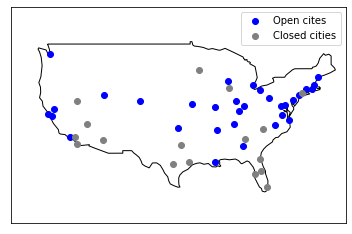


Solution: 1 
Number of closed cities: 16 
Number of open cities: 34 
Solution energy: -8495596.0 
Anticipated GDP: 8495606 (64.7%)
Hospitalizations: 299359 (99.8% of capacity) 



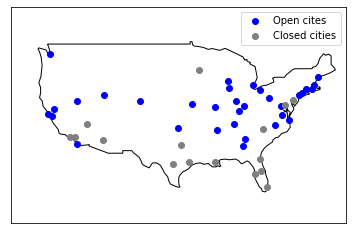


Solution: 2 
Number of closed cities: 19 
Number of open cities: 31 
Solution energy: -8326621.0 
Anticipated GDP: 8326628 (63.4%)
Hospitalizations: 297178 (99.1% of capacity) 



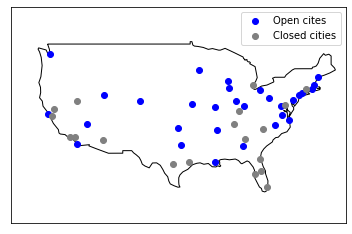


Solution: 3 
Number of closed cities: 21 
Number of open cities: 29 
Solution energy: -8284348.0 
Anticipated GDP: 8284341 (63.1%)
Hospitalizations: 298271 (99.4% of capacity) 



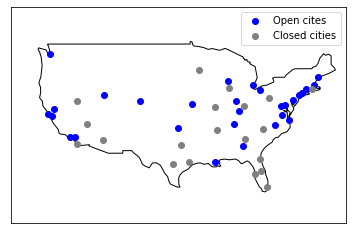


Solution: 4 
Number of closed cities: 21 
Number of open cities: 29 
Solution energy: -8266399.0 
Anticipated GDP: 8266369 (62.9%)
Hospitalizations: 296949 (99.0% of capacity) 



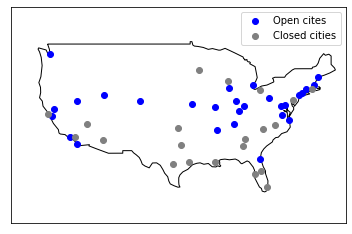


Solution: 5 
Number of closed cities: 25 
Number of open cities: 25 
Solution energy: -8228179.0 
Anticipated GDP: 8228188 (62.7%)
Hospitalizations: 299974 (100.0% of capacity) 



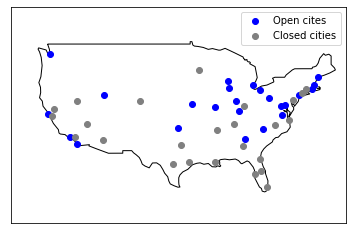


Solution: 6 
Number of closed cities: 22 
Number of open cities: 28 
Solution energy: -8219415.0 
Anticipated GDP: 8219426 (62.6%)
Hospitalizations: 296344 (98.8% of capacity) 



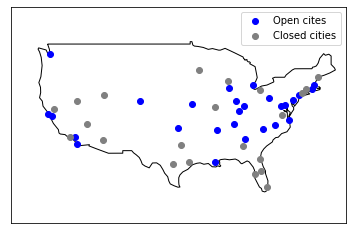


Solution: 7 
Number of closed cities: 16 
Number of open cities: 34 
Solution energy: -8022540.0 
Anticipated GDP: 8022516 (61.1%)
Hospitalizations: 298814 (99.6% of capacity) 



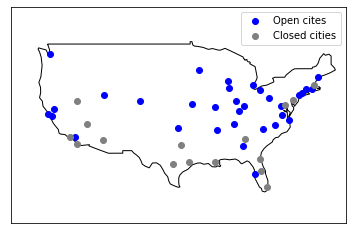


Solution: 8 
Number of closed cities: 22 
Number of open cities: 28 
Solution energy: -8003188.0 
Anticipated GDP: 8003193 (60.9%)
Hospitalizations: 299951 (100.0% of capacity) 



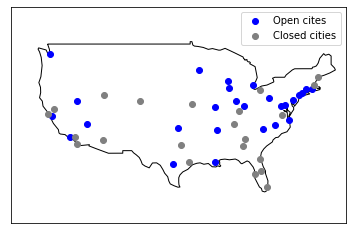


Solution: 9 
Number of closed cities: 27 
Number of open cities: 23 
Solution energy: -7980028.0 
Anticipated GDP: 7980026 (60.8%)
Hospitalizations: 299487 (99.8% of capacity) 



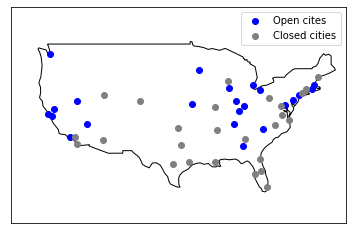

In [3]:
for sol_n in range(len(solution)):
  print("\nSolution:", sol_n, 
        "\nNumber of closed cities:", len(solution[sol_n]['closed_cities']),
        "\nNumber of open cities:", len(solution[sol_n]['open_cities']),
        "\nSolution energy:", solution[sol_n]['energy'],
        "\nAnticipated GDP:", solution[sol_n]['salvaged_gdp'],
        f"({(100*solution[sol_n]['salvaged_gdp']/sum(df['gdp'])):.1f}%)"
        "\nHospitalizations:", solution[sol_n]['used_capacity'],
        f"({(100*solution[sol_n]['used_capacity']/sick_capacity):.1f}% of capacity)",
        "\n")
  plot_map(solution[sol_n]['open_cities'], solution[sol_n]['closed_cities'])

Notice, from a side-by-side comparison of the 1st, 5th, and 10th solutions, that there is very noticeable variation. This allows the policy maker the flexibility to make choices based on other factors.

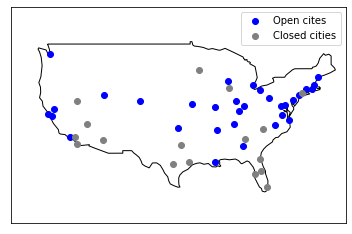

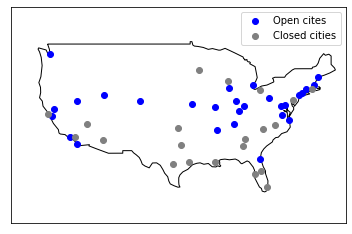

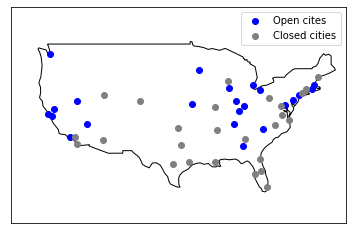

In [4]:
plot_map(solution[0]['open_cities'], solution[0]['closed_cities'])
plot_map(solution[4]['open_cities'], solution[4]['closed_cities'])
plot_map(solution[9]['open_cities'], solution[9]['closed_cities'])

It might also be interesting to get some statistics on how often cities appear in the "closed" group.

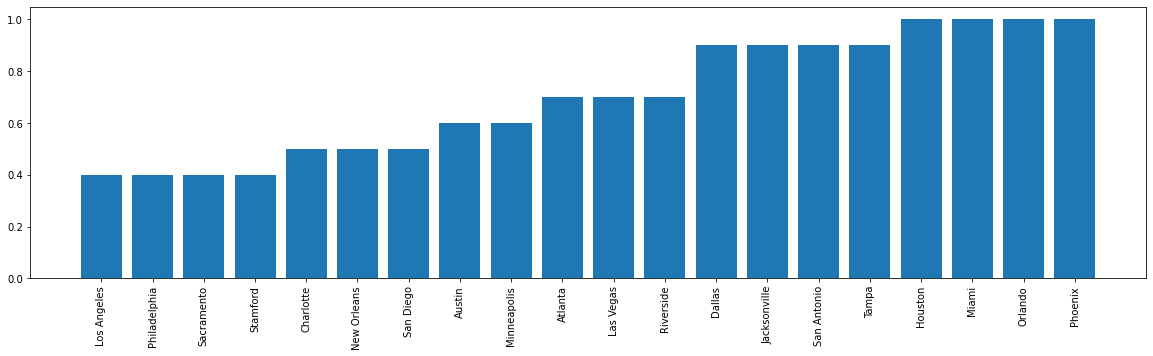

In [5]:
freq_closed = {city: 0 for city in df['city']}
for sol_n in range(len(solution)):
    closed_cities = solution[sol_n]['closed_cities']
    for city in closed_cities:
        freq_closed[city] += 1/len(solution)

cities = list(freq_closed.keys())
freqs = list(freq_closed.values())

cities = [x for _, x in sorted(zip(freqs, cities))]
freqs = sorted(freqs)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.bar(cities[-20:], freqs[-20:])
plt.xticks(rotation=90)
plt.show()

## Diving deeper: Allowing for partial shut downs

As mentioned before, a "shut down" doesn't really mean that a city's infected will completely disappear, nor does it mean that GDP will fall to zero (of course!)

We can build in a less binary view by specifying what the impact of a "shut-down" is (maybe it reduces the sick people by 80% while reducing the GDP by 50%), and we could even do this on a per-city basis.

The part that plays into our knapsack problem is that each city we don't put into the knapsack, still contributes to the overal utility function. Also, each city we don't put into the knapsack, still contributes to our overall cost function. **Check out the appendix at the end of this notebook to learn more about the math behind the problem reformulation**.

Our knapsack solver module has these extra considerations built in as options. Let's take it for a spin.


In [6]:
data_file = 'july.csv' # contains cities, gdps, number of sick people

df = pd.read_csv(data_file)

n_sims = 10 # number of low energy results to sample

# the sick capacity is up to the policy maker
# for the demonstration we set it to be approximately half of number of sick people in the USA as of mid-July 2020
value_r = 0.80 # we assume closed cities retain some % of their gdp
weight_r = 0.20 # we assume closed cities retain some % of their sick

print(f'Sampling {n_sims} low energy solutions.',
      f'Considering safe capacity of {sick_capacity} sick people at one time,',
      f'in a situation where there are currently {sum(df["sick"])} sick people.',
      f'Assuming that closed cities retain {(100*value_r):.0f}% of their GDP.',
      f'Assuming that closed cities retain {(100*weight_r):.0f}% of their sick.',
      '\n')

# use D-Wave's hybrid solver to solve the knapsack problem
%time solution=solve_cities(list(df['city']), list(df['gdp']), list(df['sick']), sick_capacity, value_r=value_r, weight_r=weight_r, num_reads=n_sims ,verbose=True)

Sampling 10 low energy solutions. Considering safe capacity of 300000 sick people at one time, in a situation where there are currently 840793 sick people. Assuming that closed cities retain 80% of their GDP. Assuming that closed cities retain 20% of their sick. 

BEST SOLUTION
Open cities
['Boston', 'Charlotte', 'Chicago', 'Cincinnati', 'Cleveland', 'Columbus', 'Detroit', 'Hartford', 'Honolulu', 'Houston', 'Indianapolis', 'Kansas City', 'Louisville', 'Memphis', 'Milwaukee', 'Minneapolis', 'Nashville', 'New York', 'Oklahoma City', 'Philadelphia', 'Portland', 'Providence', 'Raleigh', 'Sacramento', 'San Diego', 'San Jose', 'Seattle', 'Stamford', 'Washington DC']


Closed cities
['Atlanta', 'Austin', 'Baltimore', 'Dallas', 'Denver', 'Jacksonville', 'Las Vegas', 'Los Angeles', 'Miami', 'New Orleans', 'Orlando', 'Phoenix', 'Pittsburgh', 'Richmond', 'Riverside', 'Salt Lake City', 'San Antonio', 'San Francisco', 'St Louis', 'Tampa', 'Virginia Beach']


Salvaged GDP: 12093987.2 (92.1%)
Used up


Solution: 0 
Number of closed cities: 21 
Number of open cities: 29 
Solution energy: -1.2529105553426476e+16 
Anticipated GDP: 12093987.2 (92.1%)
Hospitalizations: 265281 (88.4% of capacity) 



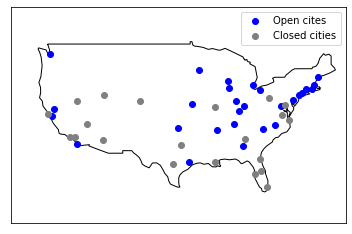


Solution: 1 
Number of closed cities: 26 
Number of open cities: 24 
Solution energy: -1.252910555339316e+16 
Anticipated GDP: 12060662.8 (91.8%)
Hospitalizations: 268617 (89.5% of capacity) 



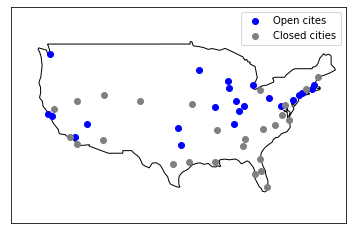


Solution: 2 
Number of closed cities: 21 
Number of open cities: 29 
Solution energy: -1.2529105553377744e+16 
Anticipated GDP: 12045275.600000001 (91.7%)
Hospitalizations: 265867 (88.6% of capacity) 



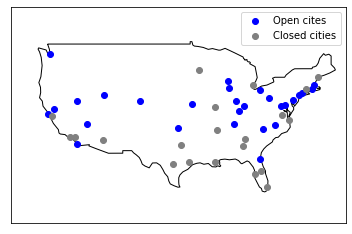


Solution: 3 
Number of closed cities: 28 
Number of open cities: 22 
Solution energy: -1.2529105553334772e+16 
Anticipated GDP: 12002272.2 (91.4%)
Hospitalizations: 269521 (89.8% of capacity) 



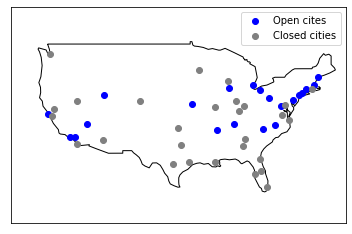


Solution: 4 
Number of closed cities: 20 
Number of open cities: 30 
Solution energy: -1.2529105553323628e+16 
Anticipated GDP: 12132929.8 (92.4%)
Hospitalizations: 268155 (89.4% of capacity) 



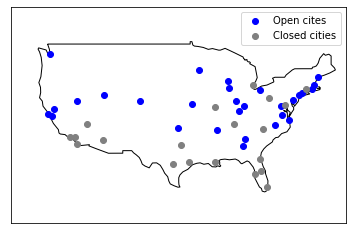


Solution: 5 
Number of closed cities: 22 
Number of open cities: 28 
Solution energy: -1.2529105553321288e+16 
Anticipated GDP: 11988826.4 (91.3%)
Hospitalizations: 265121 (88.4% of capacity) 



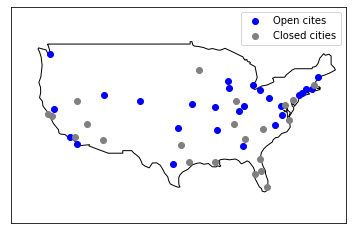


Solution: 6 
Number of closed cities: 25 
Number of open cities: 25 
Solution energy: -1.2529105553311512e+16 
Anticipated GDP: 11979029.4 (91.2%)
Hospitalizations: 266927 (89.0% of capacity) 



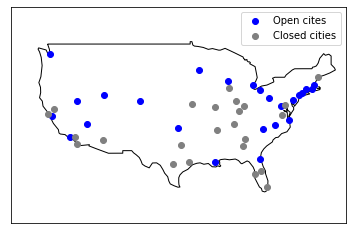


Solution: 7 
Number of closed cities: 22 
Number of open cities: 28 
Solution energy: -1.2529105553306504e+16 
Anticipated GDP: 11974008.600000001 (91.2%)
Hospitalizations: 265457 (88.5% of capacity) 



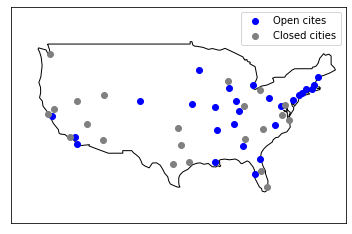


Solution: 8 
Number of closed cities: 26 
Number of open cities: 24 
Solution energy: -1.2529105553301784e+16 
Anticipated GDP: 11969293.4 (91.1%)
Hospitalizations: 265711 (88.6% of capacity) 



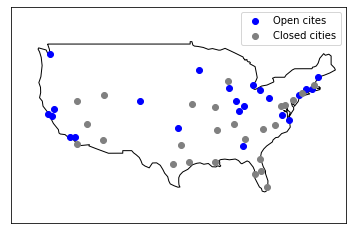


Solution: 9 
Number of closed cities: 31 
Number of open cities: 19 
Solution energy: -1.252910555329756e+16 
Anticipated GDP: 11965070.4 (91.1%)
Hospitalizations: 265272 (88.4% of capacity) 



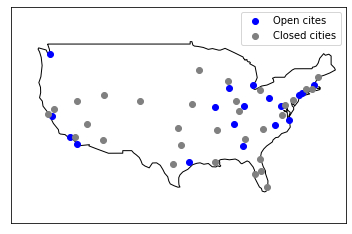

In [7]:
for sol_n in range(len(solution)):
  print("\nSolution:", sol_n, 
        "\nNumber of closed cities:", len(solution[sol_n]['closed_cities']),
        "\nNumber of open cities:", len(solution[sol_n]['open_cities']),
        "\nSolution energy:", solution[sol_n]['energy'],
        "\nAnticipated GDP:", solution[sol_n]['salvaged_gdp'],
        f"({(100*solution[sol_n]['salvaged_gdp']/sum(df['gdp'])):.1f}%)"
        "\nHospitalizations:", solution[sol_n]['used_capacity'],
        f"({(100*solution[sol_n]['used_capacity']/sick_capacity):.1f}% of capacity)",
        "\n")
  plot_map(solution[sol_n]['open_cities'], solution[sol_n]['closed_cities'])

Notice now that by incorporating the new logic, we can close more cities while salvaging more GDP. We have a more realistic model.

We know that our extra parameters made a significant difference by looking at the statistics of multiple low energy solutions. Below we show comparisons cities most frequently appearing in the `closed_cities` for our previous solutions vs this updated version.

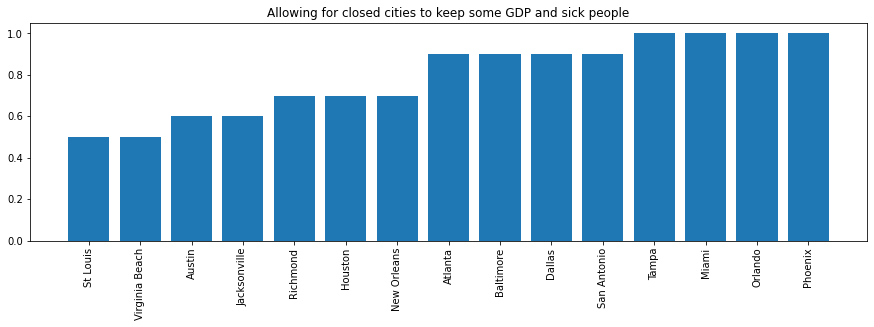

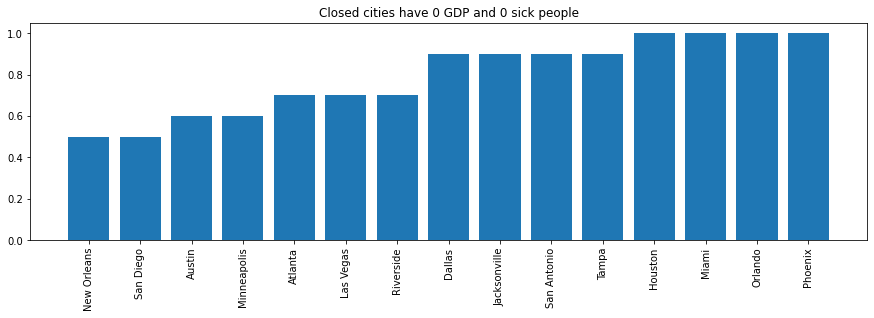

In [8]:
freq_closed = {city: 0 for city in df['city']}
for sol_n in range(len(solution)):
    closed_cities = solution[sol_n]['closed_cities']
    for city in closed_cities:
        freq_closed[city] += 1/len(solution)

cities_2 = list(freq_closed.keys())
freqs_2 = list(freq_closed.values())

cities_2 = [x for _, x in sorted(zip(freqs_2, cities_2))]
freqs_2 = sorted(freqs)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
ax.bar(cities_2[-15:], freqs_2[-15:])
plt.xticks(rotation=90)
plt.title('Allowing for closed cities to keep some GDP and sick people')
plt.show()

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
ax.bar(cities[-15:], freqs[-15:])
plt.xticks(rotation=90)
plt.title('Closed cities have 0 GDP and 0 sick people')
plt.show()

## How do solutions vary over time given historical GDP and coronavirus cases?

We'll run the same analysis as just above, but with April data instead. Then let's compare results.

In [9]:
data_file = 'april.csv' # contains cities, gdps, number of sick people

df = pd.read_csv(data_file)

n_sims = 10 # number of low energy results to sample

# the sick capacity is up to the policy maker
# for the demonstration we set it to be approximately half of number of sick people in the USA as of mid-July 2020
value_r = 0.80 # we assume closed cities retain some % of their gdp
weight_r = 0.20 # we assume closed cities retain some % of their sick

print(f'Sampling {n_sims} low energy solutions.',
      f'Considering safe capacity of {sick_capacity} sick people at one time,',
      f'in a situation where there are currently {sum(df["sick"])} sick people.',
      f'Assuming that closed cities retain {(100*value_r):.0f}% of their GDP.',
      f'Assuming that closed cities retain {(100*weight_r):.0f}% of their sick.',
      '\n')

# use D-Wave's hybrid solver to solve the knapsack problem
%time solution_april = solve_cities(list(df['city']), list(df['gdp']), list(df['sick']), sick_capacity, value_r=value_r, weight_r=weight_r, num_reads=n_sims ,verbose=True)

Sampling 10 low energy solutions. Considering safe capacity of 300000 sick people at one time, in a situation where there are currently 436770 sick people. Assuming that closed cities retain 80% of their GDP. Assuming that closed cities retain 20% of their sick. 

BEST SOLUTION
Open cities
['Atlanta', 'Austin', 'Baltimore', 'Charlotte', 'Cincinnati', 'Cleveland', 'Columbus', 'Dallas', 'Denver', 'Detroit', 'Hartford', 'Houston', 'Indianapolis', 'Jacksonville', 'Los Angeles', 'Louisville', 'Memphis', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'New York', 'Oklahoma City', 'Orlando', 'Phoenix', 'Pittsburgh', 'Portland', 'Richmond', 'Riverside', 'Sacramento', 'Salt Lake City', 'San Antonio', 'San Diego', 'San Francisco', 'San Jose', 'Seattle', 'Tampa', 'Virginia Beach', 'Washington DC']


Closed cities
['Boston', 'Chicago', 'Honolulu', 'Kansas City', 'Las Vegas', 'New Orleans', 'Philadelphia', 'Providence', 'Raleigh', 'St Louis', 'Stamford']


Salvaged GDP: 12645674.6 (96.3%)
Used up

Let's look at comparisons of the top solution in each month. First, notice that we manage to salvage a bit over 3% more GDP in April than in July. Furthermore note that it's certainly not the case that the same subset of cities should stay closed across the same two scenarios.

April closed cities: ['Boston', 'Chicago', 'Honolulu', 'Kansas City', 'Las Vegas', 'New Orleans', 'Philadelphia', 'Providence', 'Raleigh', 'St Louis', 'Stamford']


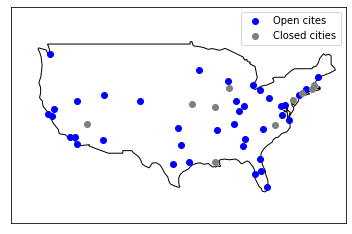

July closed cities: ['Atlanta', 'Austin', 'Baltimore', 'Dallas', 'Denver', 'Jacksonville', 'Las Vegas', 'Los Angeles', 'Miami', 'New Orleans', 'Orlando', 'Phoenix', 'Pittsburgh', 'Richmond', 'Riverside', 'Salt Lake City', 'San Antonio', 'San Francisco', 'St Louis', 'Tampa', 'Virginia Beach']


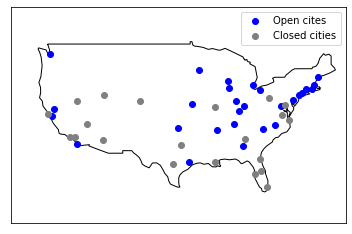

In [10]:
print('April closed cities:', solution_april[0]['closed_cities'])
plot_map(solution_april[0]['open_cities'], solution_april[0]['closed_cities'])
print('July closed cities:', solution[0]['closed_cities'])
plot_map(solution[0]['open_cities'], solution[0]['closed_cities'])

And also at the closed frequency bar plot comparison.

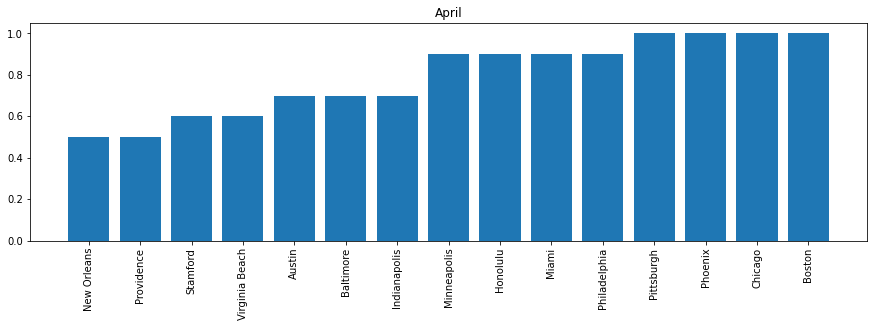

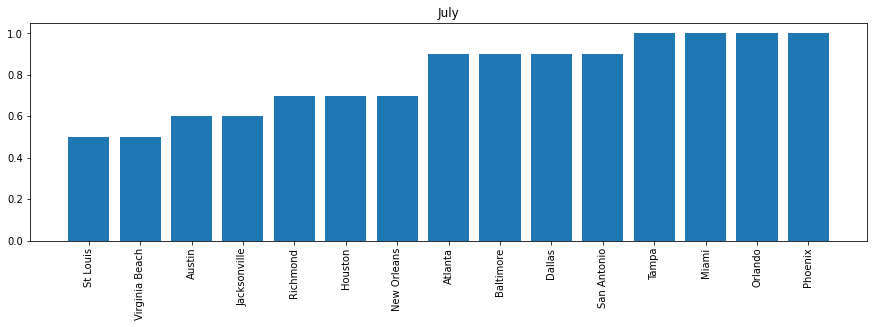

In [11]:
freq_closed = {city: 0 for city in df['city']}
for sol_n in range(len(solution_april)):
    closed_cities = solution_april[sol_n]['closed_cities']
    for city in closed_cities:
        freq_closed[city] += 1/len(solution_april)

cities_3 = list(freq_closed.keys())
freqs_3 = list(freq_closed.values())

cities_3 = [x for _, x in sorted(zip(freqs_3, cities_3))]
freqs_3 = sorted(freqs)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
ax.bar(cities_3[-15:], freqs_3[-15:])
plt.xticks(rotation=90)
plt.title('April')
plt.show()

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
ax.bar(cities_2[-15:], freqs_2[-15:])
plt.xticks(rotation=90)
plt.title('July')
plt.show()

## Appendix A: Knapsack problem reformulation

We follow section 5.2 of the paper [Ising formulations of many NP problems](https://arxiv.org/pdf/1302.5843.pdf) (and we'll pick up starting from equation 49).

### Not all sick people disappear in a closed city

The problem of keeping within total capacity is originally encoded within:

<img src="figures/ha.png" height="65px">

In order to account for the fact that closed cities (not in the Knapsack) also contribute some proportion of sick people we need to add an extra term within the right-most set of brackets as follows:

<img src="figures/ha_r_new.png" height="60px">

where we have introduced $r_{\omega}$ which represents the ratio of sick people that remain in a closed city. Now with a little bit of shuffling we get:

<img src="figures/ha_r_new2.png" height="60px">

So we have an extra constant term in the square:

<img src="figures/constant.png" height="45px">

which will contribute to some extra y terms and some extra x terms in the full expansion (we can ignore $C^2$ which is just a global constant offset):

<img src="figures/constant_contrib.png" height="60px">

In practice, we can calculate $C$ beforehand and add in the relevant terms. Then all that remains is to apply the following mapping:

<img src="figures/map.png" height="30px">

### Not all GDP is lost in a closed city

In the original formulation desire to maximize GDP is in:

<img src="figures/hb.png" height="45px">

To express that closed cities don't lose all of their GDP we add a term:

<img src="figures/hb_new.png" height="45px">

where we have introduced $r_{c}$ which represents the ratio of GDP that a closed city can retain. We can reshuffle to the following (after disregarding the new constant term which arises):

<img src="figures/hb_new2.png" height="45px">

To work this into the original problem all we have to do is apply the mapping:

<img src="figures/map2.png" height="25px">




